In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegressionCV
#from graphviz import Source

## Building the initial models

In [6]:
data = pd.read_csv("data/taxi_FINAL_FINAL.csv")

In [7]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH', 'tip_percent',
       'tip_amount_binned', 'Other', 'Upper East Side', 'Midtown', 'Greenwich',
       'Tribeca', 'Financial District'],
      dtype='object')

In [8]:
data.corr()['tip_amount_binned']

vendor_id            -0.022902
passenger_count      -0.000439
trip_distance         0.531129
pickup_longitude     -0.003706
pickup_latitude      -0.010937
dropoff_longitude    -0.016921
dropoff_latitude     -0.006572
fare_amount           0.602974
surcharge             0.047274
mta_tax                    NaN
tip_amount            0.982329
tolls_amount         -0.000182
total_amount          0.721375
duration              0.551446
time_of_day           0.027086
CRD                   0.061976
UNK                  -0.000612
NOC                  -0.093095
DIS                  -0.049496
CSH                   0.001332
tip_percent           0.571606
tip_amount_binned     1.000000
Other                 0.003192
Upper East Side      -0.016025
Midtown              -0.003769
Greenwich            -0.011386
Tribeca               0.012066
Financial District    0.043748
Name: tip_amount_binned, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime','dropoff_datetime','total_amount','mta_tax','tip_percent','tip_amount_binned']), data['tip_amount_binned'], test_size=0.30, random_state=1)

## Check for multicollinearity

,vendor_id,passenger_count,trip_distance,fare_amount,surcharge,tolls_amount,duration,time_of_day,CRD,UNK,NOC,DIS,CSH,Other,Upper East Side,Midtown,Greenwich,Tribeca,Financial District
vendor_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_distance,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surcharge,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tolls_amount,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


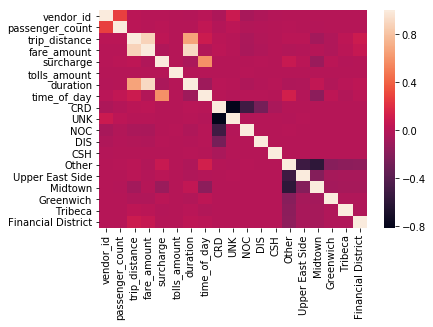

In [10]:
sns.heatmap(x_train.corr())
x_train.corr()[x_train.corr().abs() > 0.99]

In [11]:
def print_heavily_correlated_features(df, threshold=0.7):
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(x_train, 0.7)

fare_amount           2
UNK                   1
CRD                   1
trip_distance         1
duration              1
passenger_count       0
surcharge             0
tolls_amount          0
time_of_day           0
Financial District    0
Tribeca               0
NOC                   0
DIS                   0
CSH                   0
Other                 0
Upper East Side       0
Midtown               0
Greenwich             0
vendor_id             0
dtype: int64


y_pred= lasso.predict(x_test)
pre = precision_score(y_test, y_pred) # since the dataset is imbalanced
rec = recall_score(y_test, y_pred)

print('The pre score is {} and the recall score is {}'.format(pre, recall))

## Logistic Regression

In [13]:
# Fit the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# calculate the score
train_score = logreg.score(x_train, y_train)
test_score = logreg.score(x_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.30662242763809155 and the test score is 0.3064880160818023


In [ ]:
## Switch back to L1 regularization instead of L2 which is automatic 

## Classification Error

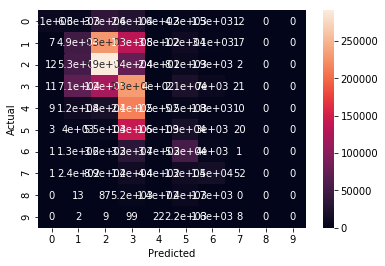

In [22]:
y_pred = logreg.predict(x_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');

In [19]:
recall = cfm[1,1] / (cfm[1,0] + cfm[1,1])
precision = cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])
print('The recall is {} and the precision is {}'.format(recall, precision))

The recall is 1.0 and the precision is 0.6666666666666666


## CART Model 

In [23]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(x_train, y_train)
train_score = cart_model.score(x_train, y_train)
test_score = cart_model.score(x_test, y_test)

In [24]:
# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.447 and 0.448 over the testing data


In [24]:
# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = df.columns[1:],
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))

NameError: name 'Source' is not defined

In [25]:
pd.Series(cart_model.feature_importances_, index=x_train.columns)

vendor_id             0.000000
passenger_count       0.000000
trip_distance         0.000000
fare_amount           0.981963
surcharge             0.000000
tolls_amount          0.000000
duration              0.000000
time_of_day           0.000000
CRD                   0.000000
UNK                   0.000000
NOC                   0.018037
DIS                   0.000000
CSH                   0.000000
Other                 0.000000
Upper East Side       0.000000
Midtown               0.000000
Greenwich             0.000000
Tribeca               0.000000
Financial District    0.000000
dtype: float64

In [26]:
cart_model.fit(x_test, y_test)
mdlAcc = np.mean((cart_model.predict(x_test) == y_test))
print('The accuracy of this model on the training data is {:.3f}'.format(round(mdlAcc,3)))

The accuracy of this model on the training data is 0.448


## Fit and score model method

In [27]:
def fit_and_score_model(mdl, x_train, x_test, y_train, y_test, random_state=0):
    """
    This function will fit and score the input mdl to the x_train and y_train 
    data, and score the mdl on y_train and y_test. To ensure results are 
    reproducible we can also set a random state.
    """
  
    # Fit an arbitrary model
    mdl.fit(x_train, y_train)
    
    # Calculate the score of the model on training and testing data
    train_score = mdl.score(x_train, y_train)
    test_score = mdl.score(x_test, y_test)
  
    # Print scores to terminal
    print('the accuracy on the: \n\t training data is {}'.format(round(train_score,3)))
    print('\t testing data is {}'.format(round(test_score, 3)))
    
    return train_score, test_score

### Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
depths = [2, 3, 4, 5, 6, 7]
accuracy = pd.Series(index=depths)
cheat_scores = {}

for max_depth in depths:

    # Initialize the model
    rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50, max_features = 0.2
    )
    
    # Fit and train model
    print('For {} max_depth '.format(max_depth), end='')
    train_score, test_score = fit_and_score_model(rf_baseline_model, x_train, x_test, y_train, y_test)
    
    # Save model performance to dataframe
    cheat_scores[max_depth] = test_score
    

For 2 max_depth the accuracy on the: 
	 training data is 0.343
	 testing data is 0.343
For 3 max_depth the accuracy on the: 
	 training data is 0.354
	 testing data is 0.354
For 4 max_depth the accuracy on the: 
	 training data is 0.391
	 testing data is 0.391
For 5 max_depth the accuracy on the: 
	 training data is 0.449
	 testing data is 0.449
For 6 max_depth the accuracy on the: 
	 training data is 0.459
	 testing data is 0.46
For 7 max_depth the accuracy on the: 
	 training data is 0.471
	 testing data is 0.471


In [ ]:
from sklearn.model_selection import cross_validate

# Initailize cross validation score DataFrame
depth_lb = 1
depth_ub = 21
cv_scores = pd.Series(index=np.arange(depth_lb, depth_ub))

for max_depth in range(depth_lb, depth_ub):
  
  # Initialize the model
  rf_cv1_model = RandomForestClassifier(random_state = 0, max_depth = max_depth,
                          n_estimators = 50, max_features = 0.2)

  # Run cross validation to get measure of out-of-sample error
  example_cv_results = cross_validate(rf_cv1_model, x_train, y_train, cv=5)
  
  # Record the average out-of-sample error
  cv_scores.loc[max_depth] = example_cv_results['test_score'].mean()

In [ ]:
sns.scatterplot(x=cv_scores.index, y=cv_scores.values)
plt.xlabel('Max Depth')
plt.ylabel('Score')

cv_scores.idxmax()

### Manual feature selection

In [30]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH', 'tip_percent',
       'tip_amount_binned', 'Other', 'Upper East Side', 'Midtown', 'Greenwich',
       'Tribeca', 'Financial District'],
      dtype='object')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data[['fare_amount','NOC']], data['tip_amount_binned'], test_size=0.30, random_state=1)

In [33]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(x_train, y_train)
train_score = cart_model.score(x_train, y_train)
test_score = cart_model.score(x_test, y_test)

In [34]:
# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.447 and 0.448 over the testing data


In [35]:
rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50, max_features = 0.2)

In [36]:
train_score, test_score = fit_and_score_model(rf_baseline_model, x_train, x_test, y_train, y_test)

the accuracy on the: 
	 training data is 0.476
	 testing data is 0.477
